In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy import *
from scipy.linalg import *
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

e = math.exp(1)
tau = (1+sqrt(5))/2

In [15]:
def f(x1,x2):
    return x1**3+x2**2-3*x1-2*x2+4

s = 0.0000001 

def derx1(x1,x2):
    return (f(x1+s,x2) - f(x1,x2))/s

def derx2(x1,x2):
    return (f(x1,x2+s) - f(x1,x2))/s



def gradf(x1,x2):
    gr1 = derx1(x1,x2)
    gr2 = derx2(x1,x2)
    g = np.array([[gr1],
                  [gr2]])
    return g

def Hessf(x1,x2):
    H11 = (derx1(x1+s,x2)-derx1(x1,x2))/s
    H12 = (derx1(x1,x2+s)-derx1(x1,x2))/s
    H21 = (derx2(x1+s,x2)-derx2(x1,x2))/s
    H22 = (derx2(x1,x2+s)-derx2(x1,x2))/s
    H = np.array([[H11, H12],
                  [H21, H22]])
    return H

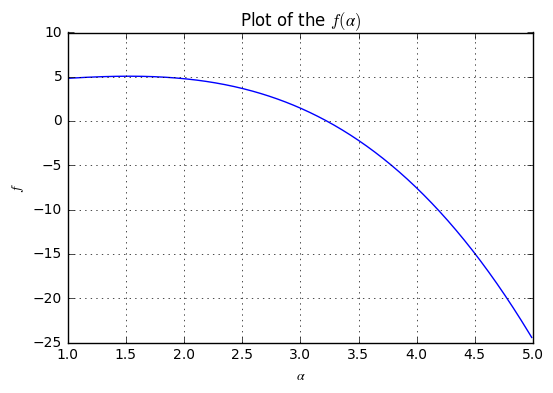

In [20]:
a = 1; b = 5
xk = np.array([0,2])
pk = np.linalg.solve(Hessf(xk[1],xk[1]),-gradf(xk[1],xk[1]))
alpha = np.arange(a,b,0.01)
plt.xlabel('$α$')
plt.ylabel('$f$')
plt.title('Plot of the $f(α)$')
plt.plot(alpha, f(xk[0]+alpha*pk[0],xk[1]+alpha*pk[1]))
plt.grid()
#plt.show()

1 [0.0051319620510018316, 0.0083036890274955834] [0, 0.0083036890274955834] 2.10690724127e-10


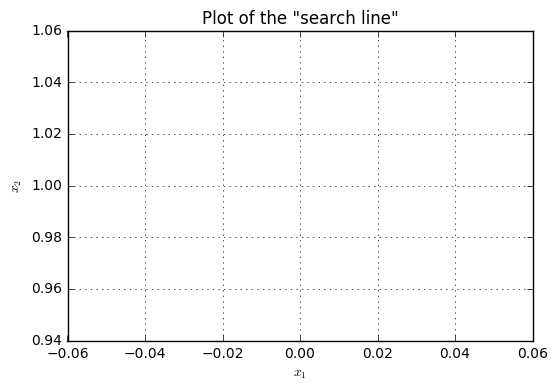

In [22]:
xk = np.array([0,1])

epsilon = 0.000001
k = 0
XX1 = []
XX2 = []
while True: 
    
    XX1.append(xk[0])
    XX2.append(xk[1])
    
    prevx1 = xk[0]
    prevx2 = xk[1]

    eps = 0.01
    a = 0; b = 7
    pk = np.linalg.solve(Hessf(xk[1],xk[1]),-gradf(xk[1],xk[1]))

    kk = 0
    while ((b-a) > eps):
        alpha1 = b - (b-a)/tau; alpha2 = a + (b-a)/tau
        if f(xk[0]+alpha1*pk[0],xk[1]+alpha1*pk[1]) < f(xk[0]+alpha2*pk[0],xk[1]+alpha2*pk[1]):
            b = alpha2
        else:
            a = alpha1
        kk += 1
        #print(kk, [alpha1, alpha2], [a,b])
    alphax = (a+b)/2

    xk = xk + alphax*pk.T
    xk = np.array([xk[0,0], xk[0,1]])
    k += 1
    
    epsilonk = abs(f(xk[0], xk[1]) - f(prevx1, prevx2))/abs(f(prevx1, prevx2))
    print(k, [alpha1, alpha2], [a,b], epsilonk)

    if epsilonk < epsilon:
        break
    
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Plot of the "search line"')
plt.plot(XX1,XX2)
#plt.show()

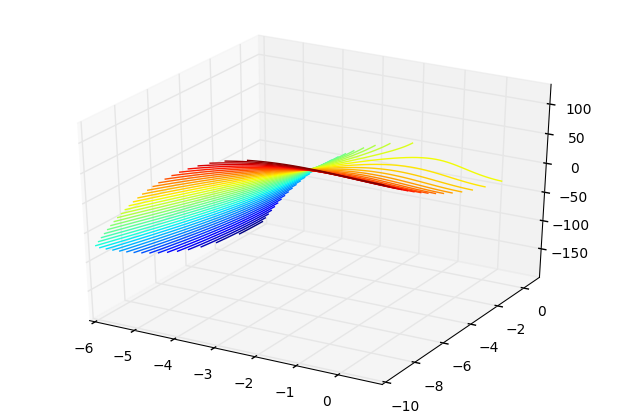

In [24]:
def Data():
    X1 = np.arange (-6, 1, 0.1)
    X2 = np.arange (-10, 1, 0.1)
    X1grid, X2grid = np.meshgrid(X1, X2)

    Zgrid = f(X1grid,X2grid)
    return X1grid, X2grid, Zgrid

x, y, z = Data()

fig = pylab.figure()
axes = Axes3D(fig)

#axes.plot_surface(x, y, z)
axes.contour(x, y, z, 50)
axes.plot(XX1, XX2)
#pylab.show()